In [1]:
import os

%load_ext autoreload
%autoreload 2

"""

DEcoding shapes, in pool where there are novel and learned shapes
Questions:
- Decoding for learned shapes is better
- Learned genearlize to themselves and novel to themselves more.
"""

'\n\nDEcoding shapes, in pool where there are novel and learned shapes\nQuestions:\n- Decoding for learned shapes is better\n- Learned genearlize to themselves and novel to themselves more.\n'

# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [ ]:
# Method 1 - load a single DFallPA
DFallpa = load_handsaved_wrapper()


In [ ]:
# Method 1 - load a single DFallPA
animal = "Diego"
date = 240522
DFallpa = load_handsaved_wrapper(animal=animal, date=date, version="trial")


In [ ]:
dflab = DFallpa["pa"].values[0].Xlabels["trials"]
dflab["aborted"].value_counts()

In [ ]:
# # Method 2 - Combine two dfallpa
# DFallpa1 = load_handsaved_wrapper(animal="Diego", date=230630, version="trial")
# DFallpa2 = load_handsaved_wrapper(animal="Diego", date=230630, version="stroke")
# DFallpa = pd.concat([DFallpa1, DFallpa2]).reset_index(drop=True)


In [ ]:
# # Method 2 - Combine two dfallpa
# animal = "Diego"
# date = 231211
# COMBINE_AREAS = True

# DFallpa1 = load_handsaved_wrapper(animal=animal, date=date, version="trial", combine_areas=COMBINE_AREAS, use_time=False)
# DFallpa2 = load_handsaved_wrapper(animal=animal, date=date, version="stroke", combine_areas=COMBINE_AREAS, use_time=False)
# DFallpa = pd.concat([DFallpa1, DFallpa2]).reset_index(drop=True)


# Preprocessing

In [ ]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [ ]:

# Prune to chans that are common across pa for each bregion (intersection of chans)|
dfpa_match_chans_across_pa_each_bregion(DFallpa)

In [ ]:
# SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/decode_moment/PSYCHO_SP/{animal}-{date}"
SAVEDIR = f"/tmp/NOVEL_PRIMS/{animal}-{date}"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

# Preprocessing

##### Devo -- removing noisy channels

In [ ]:
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels
dfpa_concatbregion_preprocess_clean_bad_channels(DFallpa, PLOT=False)

# Sqrt normalization

In [ ]:
for pa in DFallpa["pa"]:
    pa.X = pa.X**0.5

### FR Normalization

##### Method 1 - each PA normalize independently

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

##### Method 2 - Concat events (for each bregion) and normalize all same way


In [ ]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
dfpa_concat_normalize_fr_split_multbregion(DFallpa)


##### Method 3 - concat events (flexible version, only constrianed to have same n chans across PA) [works if have both trial and stroke!]

In [ ]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion_flex
fr_mean_subtract_method = "across_time_bins"
# fr_mean_subtract_method = "each_time_bin"
PLOT=False

pa = DFallpa["pa"].values[10]
pa.plotNeurHeat(0)

dfpa_concat_normalize_fr_split_multbregion_flex(DFallpa, fr_mean_subtract_method, PLOT)

pa = DFallpa["pa"].values[10]
pa.plotNeurHeat(0)

# Extract relevant variables


In [ ]:
from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap
grouping_plot_n_samples_conjunction_heatmap(dflab, "seqc_0_shape", "shape_is_novel_all")

In [ ]:
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import dfallpa_preprocess_condition
# shape_var_suff = "shapesemgrp"|
# loc_var_suff = "loc_on_clust"
shape_var_suff = "shape"
loc_var_suff = "loc"
dfallpa_preprocess_condition(DFallpa, shape_var_suff, loc_var_suff)

# Extract beh data

In [ ]:
# from neuralmonkey.analyses.decode_moment import analy_psychoprim_prepare_beh_dataset
# DSmorphsets, map_tc_to_morph_info, map_morphset_to_basemorphinfo, map_tcmorphset_to_idxmorph, map_tcmorphset_to_info, map_morphsetidx_to_assignedbase_or_ambig, map_tc_to_morph_status = analy_psychoprim_prepare_beh_dataset(animal, date)

# Train / test

In [ ]:
from neuralmonkey.analyses.decode_moment import train_decoder_helper, pipeline_train_test_scalar_score, pipeline_train_test_scalar_score_with_splits, pipeline_train_test_scalar_score_mult_train_dataset, test_decoder_helper, train_decoder_helper_extract_train_dataset
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import get_dataset_params
import os

In [ ]:
# get list of base prim names

In [ ]:

SAVEDIR_BASE = "/tmp/NOVELPRIMS"
os.makedirs(SAVEDIR_BASE, exist_ok=True)

In [ ]:
date

In [ ]:
from neuralmonkey.scripts.analy_decode_moment_novelprims import analy_novelprim_prepare_dataset
analy_novelprim_prepare_dataset(DFallpa, SAVEDIR_BASE)

# One decoder for each shape - visualize generalization patterns

In [ ]:
bregion = "PMv"


In [ ]:
# Average over all train-test split
if False: # Doesnt work well, takes too long.
    cols_ignore = ["pa_idx", "decoder_idx", "train_split_idx"]
    cols_float = [col for col in dfscores.columns if dfscores[col].dtype == float]
    # cols_cat = [col for col in dfscores.columns if dfscores[col].dtype != float]
    # cols_cat = [col for col in cols_cat if col not in cols_ignore]
    cols_cat = ['decoder_class', 'pa_class', 'twind', 'epoch', 'trialcode']
    from pythonlib.tools.pandastools import aggregGeneral
    dfscores = aggregGeneral(dfscores, cols_cat, cols_float, nonnumercols="all")
    # Average over all train-test split
    [col for col in dfscores if isinstance(dfscores[col], float)]

### Method 1 -- not doing split by gridloc

In [ ]:
downsample_trials = False
if downsample_trials:
    # So that the lowest N doesnt pull all other categories down.
    n_min_per_var = 10
else:
    n_min_per_var = 7
        
TWIND_TEST = (0.05, 1.2)

do_upsample_balance=True
PLOT_DECODER = False
DO_TRAIN_TEST_SPLIT=True
PLOT_TEST_CONCATTED = True

TWIND_TRAIN = (0.05, 1.2)

# Subtrract baseline?
subtract_baseline=False
subtract_baseline_twind=None
include_null_data = False
prune_labels_exist_in_train_and_test = True

# - Train params
event_train = "03_samp"
twind_train = TWIND_TRAIN
var_train = "seqc_0_shape_pref"
filterdict_train = None

# - Test params
var_test = "seqc_0_shape_pref"
event_test = "03_samp"
which_level_test = "trial"
filterdict_test = None
# list_twind_test = [(-0.8, -0.05), TWIND_TEST]
list_twind_test = [TWIND_TEST]

# Train/test splits
do_train_splits_nsplits=10
score_user_test_data = False
PLOT_TEST_SPLIT = False

# Other params
SAVEDIR = f"{SAVEDIR_BASE}/downsample_trials={downsample_trials}-TWIND_TEST={TWIND_TEST}-dotraintestsplit={DO_TRAIN_TEST_SPLIT}"

list_bregion = DFallpa["bregion"].unique().tolist()
for bregion in list_bregion:
    savedir = f"{SAVEDIR}/{bregion}/decoder_training"
    os.makedirs(savedir, exist_ok=True)
    print(savedir)

    if not DO_TRAIN_TEST_SPLIT:
        dfscores, Dc, PAtrain, PAtest = pipeline_train_test_scalar_score(DFallpa, bregion, var_train, event_train, 
                                                                        twind_train, filterdict_train,
                                            var_test, event_test, list_twind_test, filterdict_test, savedir,
                                            include_null_data=include_null_data, decoder_method_index=None,
                                            prune_labels_exist_in_train_and_test=prune_labels_exist_in_train_and_test, PLOT=PLOT_DECODER,
                                            which_level_test=which_level_test, n_min_per_var=n_min_per_var,
                                            subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind,
                                            do_upsample_balance=do_upsample_balance, downsample_trials=downsample_trials)
    else:
        dfscores, dfscores_usertest, dfscores_both, decoders, trainsets, PAtest = pipeline_train_test_scalar_score_with_splits(DFallpa, 
                                                                        bregion, var_train, event_train, 
                                                                        twind_train, filterdict_train,
                                            var_test, event_test, list_twind_test, filterdict_test, savedir,
                                            include_null_data=include_null_data, decoder_method_index=None,
                                            prune_labels_exist_in_train_and_test=prune_labels_exist_in_train_and_test, 
                                            PLOT_TRAIN=PLOT_DECODER, PLOT_TEST_SPLIT=PLOT_TEST_SPLIT, PLOT_TEST_CONCATTED=PLOT_TEST_CONCATTED,
                                            which_level_test=which_level_test, n_min_per_var=n_min_per_var,
                                            subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind,
                                            do_upsample_balance=do_upsample_balance, downsample_trials=downsample_trials,
                                            do_train_splits_nsplits=do_train_splits_nsplits, 
                                            score_user_test_data=score_user_test_data)

    ######################## PLOTS
    from neuralmonkey.analyses.decode_moment import analy_psychoprim_score_postsamp
    savedir = f"{SAVEDIR}/{bregion}/PLOTS"
    os.makedirs(savedir, exist_ok=True)
    print(savedir)
    analy_novelprim_score_postsamp(dfscores, decoders, dflab, savedir)                

### Method 2 - splitting by gridloc

In [ ]:
from neuralmonkey.analyses.decode_moment import pipeline_train_test_scalar_score_split_gridloc
bregion = "PMv"
dflab = pa.Xlabels["trials"]
list_loc = dflab["seqc_0_loc"].unique().tolist()
auto_prune_locations = True

In [ ]:
dflab["aborted"].value_counts()

In [ ]:


        
filterdict_train = None
filterdict_test = None


### OTher params.
TWIND_TEST = (0.05, 1.2)
TWIND_TRAIN = (0.05, 1.2)

do_upsample_balance=True
PLOT_DECODER = False

# Subtrract baseline?
subtract_baseline=False
subtract_baseline_twind=None
include_null_data = False
prune_labels_exist_in_train_and_test = True

# - Train params
event_train = "03_samp"
twind_train = TWIND_TRAIN
var_train = "seqc_0_shape_pref"

# - Test params
var_test = "seqc_0_shape_pref"
event_test = "03_samp"
which_level_test = "trial"
# list_twind_test = [(-0.8, -0.05), TWIND_TEST]
list_twind_test = [TWIND_TEST]

# Other params
SAVEDIR = f"{SAVEDIR_BASE}/downsample_trials={downsample_trials}-TWIND_TEST={TWIND_TEST}-split_by_gridloc"




list_bregion = DFallpa["bregion"].unique().tolist()
for bregion in list_bregion:
    savedir_base = f"{SAVEDIR}/{bregion}/decoder_training"
    os.makedirs(savedir_base, exist_ok=True)
    print(savedir_base)

    DFSCORES, decoders, list_pa_train, list_pa_test = pipeline_train_test_scalar_score_split_gridloc(list_loc, savedir_base,
                                                                                                     DFallpa, 
                                                                    bregion, var_train, event_train, 
                                                                    twind_train, filterdict_train,
                                        var_test, event_test, list_twind_test, filterdict_test, 
                                        include_null_data=include_null_data, 
                                        prune_labels_exist_in_train_and_test=prune_labels_exist_in_train_and_test, 
                                        PLOT=PLOT_DECODER,
                                        which_level_test=which_level_test, n_min_per_var=n_min_per_var,
                                        subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind,
                                        do_upsample_balance=do_upsample_balance, downsample_trials=downsample_trials,
                                        auto_prune_locations=auto_prune_locations)

    # ######################## PLOTS
    # from neuralmonkey.analyses.decode_moment import analy_psychoprim_score_postsamp
    # savedir = f"{SAVEDIR}/{bregion}/PLOTS"
    # os.makedirs(savedir, exist_ok=True)
    # print(savedir)
    # analy_novelprim_score_postsamp(dfscores, decoders, dflab, savedir)                


# MULT BREGIONS - load and compare

In [3]:
import pandas as pd
from neuralmonkey.classes.session import _REGIONS_IN_ORDER, _REGIONS_IN_ORDER_COMBINED
from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap, stringify_values, aggregGeneral
from neuralmonkey.scripts.analy_decode_moment_psychometric import prune_dfscores_good_morphset


In [4]:
SAVEDIR_BASE = "/lemur2/lucas/analyses/recordings/main/decode_moment/NOVEL_PRIMS"
# /lemur2/lucas/analyses/recordings/main/decode_moment/NOVEL_PRIMS/Pancho-240523-combine=False


In [5]:


downsample_trials = True
# TWIND_TEST = (0.05, 1.2)
version = "split_gridloc"


In [6]:

for animal, date, combine in [("Pancho", 240523, False), ("Diego", 240522, True)]:
    for TWIND_TEST in [(0.05, 1.2), (0.6, 1.2)]:


SyntaxError: unexpected EOF while parsing (1114087011.py, line 2)

In [7]:
# animal, date, combine = ("Diego", 240522, True)
# TWIND_TEST = (0.05, 1.2)

animal, date, combine = ("Pancho", 240523, False)
TWIND_TEST = (0.05, 1.2)

                    
if combine:
    list_bregion = _REGIONS_IN_ORDER_COMBINED
else:
    list_bregion = _REGIONS_IN_ORDER

if animal == "Pancho":
    list_bregion = [br for br in list_bregion if br!="PMv_l"]

list_dfscores = []
list_Dc = []
for bregion in list_bregion:
    path = f"{SAVEDIR_BASE}/{animal}-{date}-combine={combine}/downsample_trials={downsample_trials}-TWIND_TEST={TWIND_TEST}-version={version}/{bregion}/dfscores.pkl"
    print("Loading ... ", path)
    dfscores = pd.read_pickle(path)
    dfscores["bregion"] = bregion
    list_dfscores.append(dfscores)

    path = f"{SAVEDIR_BASE}/{animal}-{date}-combine={combine}/downsample_trials={downsample_trials}-TWIND_TEST={TWIND_TEST}-version={version}/{bregion}/Dc.pkl"
    print("Loading ... ", path)
    Dc = pd.read_pickle(path)
    list_Dc.append(Dc)
DFSCORES = pd.concat(list_dfscores).reset_index(drop=True)

assert False


Loading ...  /lemur2/lucas/analyses/recordings/main/decode_moment/NOVEL_PRIMS/Pancho-240523-combine=False/downsample_trials=True-TWIND_TEST=(0.05, 1.2)-version=split_gridloc/M1_m/dfscores.pkl
Loading ...  /lemur2/lucas/analyses/recordings/main/decode_moment/NOVEL_PRIMS/Pancho-240523-combine=False/downsample_trials=True-TWIND_TEST=(0.05, 1.2)-version=split_gridloc/M1_m/Dc.pkl
TODO: Pancho -- combine circles with the tohers
Loading ...  /lemur2/lucas/analyses/recordings/main/decode_moment/NOVEL_PRIMS/Pancho-240523-combine=False/downsample_trials=True-TWIND_TEST=(0.05, 1.2)-version=split_gridloc/M1_l/dfscores.pkl
Loading ...  /lemur2/lucas/analyses/recordings/main/decode_moment/NOVEL_PRIMS/Pancho-240523-combine=False/downsample_trials=True-TWIND_TEST=(0.05, 1.2)-version=split_gridloc/M1_l/Dc.pkl
Loading ...  /lemur2/lucas/analyses/recordings/main/decode_moment/NOVEL_PRIMS/Pancho-240523-combine=False/downsample_trials=True-TWIND_TEST=(0.05, 1.2)-version=split_gridloc/PMv_m/dfscores.pkl
Loa

AssertionError: 

In [8]:
from neuralmonkey.scripts.analy_decode_moment_novelprims import analy_novelprims_dfscores_condition

dflab = pd.concat([Dc.PAtrain.Xlabels["trials"] for Dc in list_Dc]).reset_index(drop=True)
map_tc_to_novel, map_shape_to_novel = analy_novelprims_dfscores_condition(DFSCORES, dflab)

In [9]:
print("shapes exist in Dfscores[decoder_class] but not in dflab:")
sorted(set([sh for sh in DFSCORES["decoder_class"].unique() if sh not in dflab["seqc_0_shape_pref"].unique().tolist()]))
print("shapes exist in Dfscores[pa_class] but not in dflab:")
sorted(set([sh for sh in DFSCORES["pa_class"].unique() if sh not in dflab["seqc_0_shape_pref"].unique().tolist()]))

shapes exist in Dfscores[decoder_class] but not in dflab:
shapes exist in Dfscores[pa_class] but not in dflab:


[]

In [38]:
SAVEDIR = f"{SAVEDIR_BASE}/MULT_BREGION/{animal}-{date}-combine={combine}/downsample_trials={downsample_trials}-TWIND_TEST={TWIND_TEST}-version={version}"
print("SAving at: ", SAVEDIR)


### PReprocessing
assert len(DFSCORES["twind"].unique())==1, "code below assumes"
# Get score relative to chance (50%)
score_chance = 0.5
DFSCORES["score_adjusted"] = (DFSCORES["score"] - score_chance)/(1. - score_chance)

assert DFSCORES.groupby(["bregion", "trialcode", "decoder_class"]).size().max() == 1, "mistake, maybe diff train-test splits applied to same trial? this is doublecoutning."


SAving at:  /lemur2/lucas/analyses/recordings/main/decode_moment/NOVEL_PRIMS/MULT_BREGION/Pancho-240523-combine=False/downsample_trials=True-TWIND_TEST=(0.05, 1.2)-version=split_gridloc


In [ ]:
# aggregate -- each datapt = (pa_class, decoder_class)
from pythonlib.tools.pandastools import aggregGeneral
DFSCORES_AGG = aggregGeneral(DFSCORES, ["pa_class", "decoder_class", "bregion", "twind"], ["score", "score_adjusted"], "all")


In [40]:
# Keep only shapes with n min data (for both pa and decoder class columns)
dftmp = DFSCORES.groupby(["bregion", "twind", "pa_class", "decoder_class"]).size().reset_index()
dftmp

pa_class_keep =[]
pa_class_remove = []
n_min = 12
for pa_class in dftmp["pa_class"].unique().tolist():
    n1 = min(dftmp[dftmp["pa_class"] == pa_class][0])
    n2 = max(dftmp[dftmp["pa_class"] == pa_class][0])
    if n1<n_min:
        pa_class_remove.append(pa_class)
    else:
        pa_class_keep.append(pa_class)

print("Keeping these pa_class: ")
for x in pa_class_keep:
    print(x)
DFSCORES_CLEAN = DFSCORES[(DFSCORES["pa_class"].isin(pa_class_keep)) & (DFSCORES["decoder_class"].isin(pa_class_keep))].reset_index(drop=True)
DFSCORES_CLEAN_AGG = DFSCORES_AGG[(DFSCORES_AGG["pa_class"].isin(pa_class_keep)) & (DFSCORES_AGG["decoder_class"].isin(pa_class_keep))].reset_index(drop=True)

print("Pruned from len: ", len(DFSCORES), " to ", len(DFSCORES_CLEAN))

Keeping these pa_class: 
L|Lcentered-17-17.0-17.0
L|Lcentered-5-5.0-5.0
L|Lcentered-9-9.0-9.0
L|V-15-15.0-15.0
L|V-16-16.0-16.0
L|V-8-8.0-8.0
L|arcdeep-12-12.0-12.0
L|arcdeep-6-6.0-6.0
L|arcdeep-7-7.0-7.0
L|circle-11-11.0-11.0
L|line-10-10.0-10.0
L|line-2-2.0-2.0
L|line-3-3.0-3.0
L|line-4-4.0-4.0
L|squiggle3-0-0.0-0.0
L|squiggle3-1-1.0-1.0
L|squiggle3-13-13.0-13.0
N|Lcentered-32-32.0-32.0
N|Lcentered-48-48.0-48.0
N|Lcentered-50-50.0-50.0
N|Lcentered-51-51.0-51.0
N|Lcentered-55-55.0-55.0
N|Lcentered-59-59.0-59.0
N|arcdeep-21-21.0-21.0
N|line-26-26.0-26.0
N|line-27-27.0-27.0
N|line-54-54.0-54.0
N|squiggle3-25-25.0-25.0
N|squiggle3-31-31.0-31.0
N|squiggle3-44-44.0-44.0
Pruned from len:  837270  to  244800


In [ ]:
### PLOTS

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


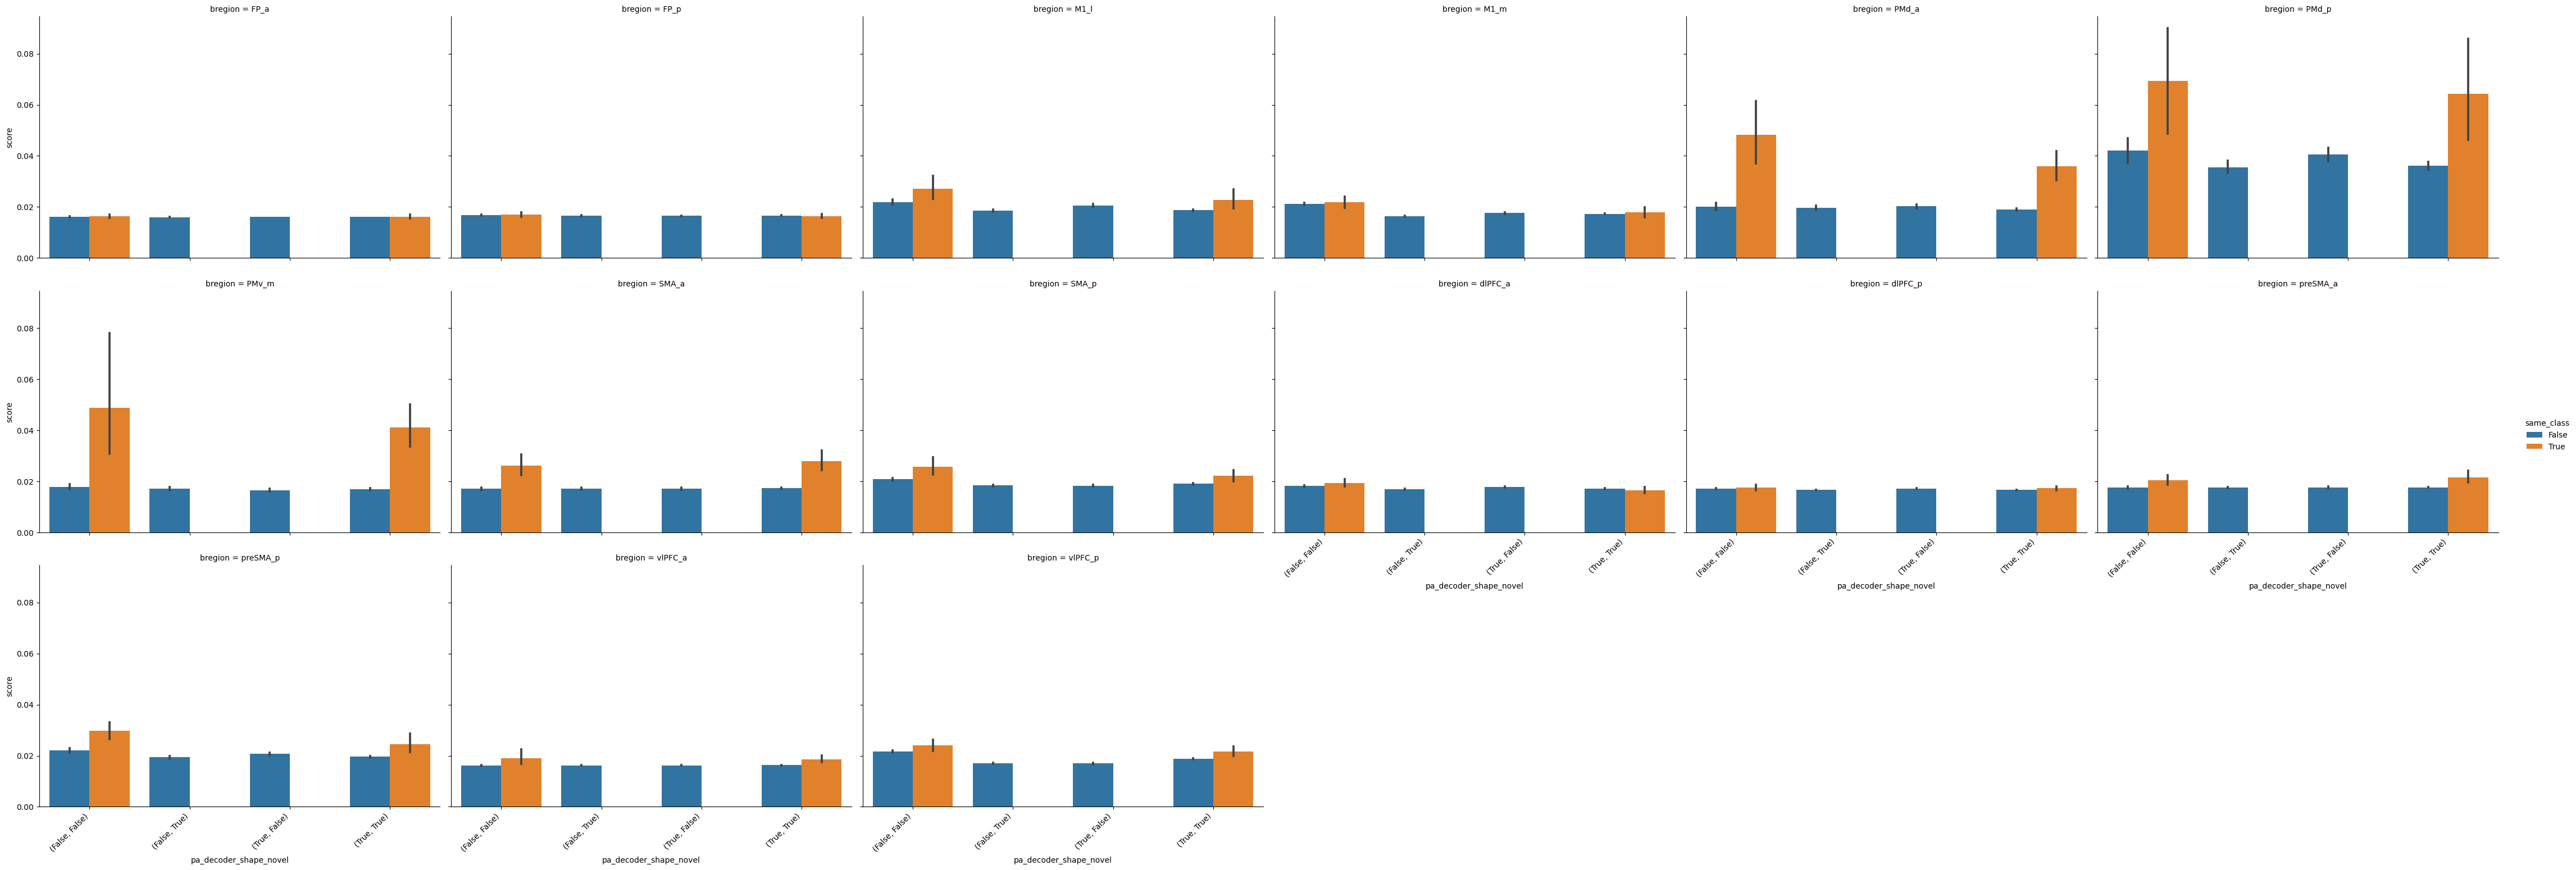

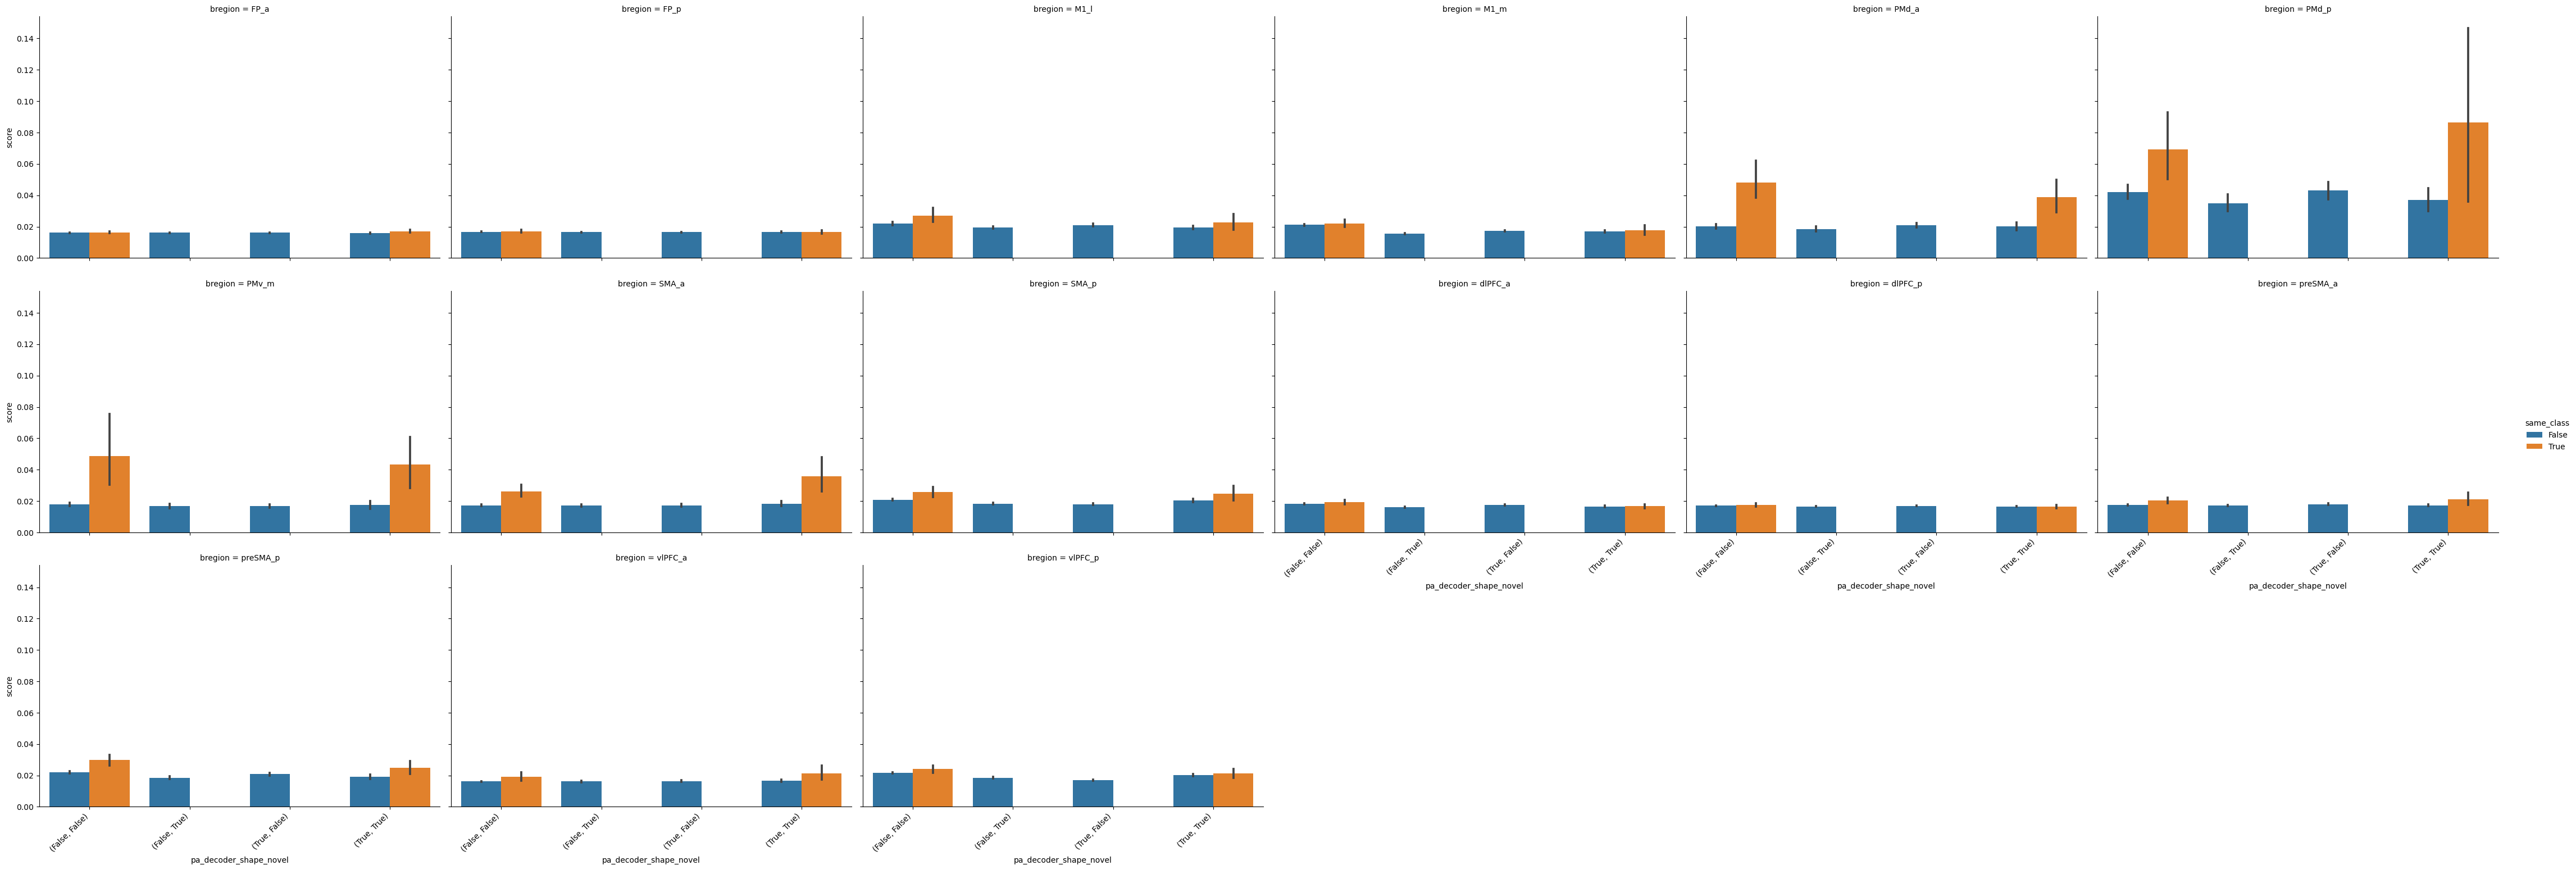

In [44]:
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel

### (2) Novel prims --> better generalization to other novel prims? (i.e., diff subspace for learned vs. novel)
yvar = "score"
for dfscores in [DFSCORES_AGG, DFSCORES_CLEAN_AGG]:

    # fig = sns.catplot(data=dfscores, x="pa_class", y=yvar, hue="same_class", kind="bar", col="pa_decoder_shape_novel", aspect=1.5)
    # rotateLabel(fig)
    # savefig(fig, f"{savedir}/catplot-pa_class-2.pdf")

    fig = sns.catplot(data=dfscores, x="pa_decoder_shape_novel", y=yvar, hue="same_class", kind="bar", aspect=1.5, col="bregion", col_wrap=6)
    rotateLabel(fig)
    # savefig(fig, f"{savedir}/catplot-pa_decoder_shape_novel-3.pdf")

    # plt.close("all")


In [46]:
# Score by ranking across decoders.
import scipy.stats as ss

DFSCORES_THIS = DFSCORES_CLEAN

res = []
ndecoders = len(DFSCORES_THIS["decoder_class"].unique())
for bregion in list_bregion:
    print(bregion)
    dfscores = DFSCORES_THIS[DFSCORES_THIS["bregion"] == bregion].reset_index(drop=True)

    # - first, make sure is square, and that each (trialcode, decoder) has just 1 datapt
    dftmp = dfscores.groupby(["trialcode"])["decoder_class"].size()
    assert min(dftmp)==max(dftmp), "some trialcodes have diff n decoder classes..."
    assert min(dftmp) == ndecoders

    # for each trial, rank all decoders.
    # list_ranks = []
    list_trialcode = dfscores["trialcode"].unique().tolist()
    for tc in list_trialcode:
        dfthis = dfscores[dfscores["trialcode"] == tc]
        # print(tc)
        assert len(dfthis["decoder_class"]) == len(set(dfthis["decoder_class"]))

        classes = dfthis["decoder_class"].values
        sames = dfthis["same_class"].values
        scores = dfthis["score"].values
        class_this = dfthis["pa_class"].unique().tolist()[0]

        # convert array1 to ranks
        # highest score gets lower rank num (e..g, 1)
        # ie., 1 means you have the highest score
        ranks = ss.rankdata(-scores, method="min") # e..g, [12 13 2 2] --> [3 4 1 1]

        # # ntot = len(ranks)
        # if ntot is None:
        #     ntot = len(ranks)
        # else:
        #     assert ntot == len(ranks)

        # the index of the decoder that matches this trial
        idx_pa_class = classes.tolist().index(class_this)
        rank_this = ranks[idx_pa_class]
        assert sames[idx_pa_class]==True, "sanity cehck"

        # list_ranks.append(rank_this)

        res.append({
            "bregion":bregion,
            "trialcode":tc,
            "pa_class":class_this,
            "rank":rank_this, # 1 means highest score
        })

M1_m
M1_l
PMv_m
PMd_p
PMd_a
dlPFC_p
dlPFC_a
vlPFC_p
vlPFC_a
FP_p
FP_a
SMA_p
SMA_a
preSMA_p
preSMA_a


In [47]:
dfranks = pd.DataFrame(res)
# Add other variables (novel , etc)

# [map_tc_to_novel[tc] for tc in dfranks["trialcode"]]
dfranks["pa_class_novel"] = [map_shape_to_novel[sh] for sh in dfranks["pa_class"]]
dfranks

,bregion,trialcode,pa_class,rank,pa_class_novel
0,M1_m,240523-1-1,L|squiggle3-0-0.0-0.0,15,False
1,M1_m,240523-1-10,L|line-2-2.0-2.0,17,False
2,M1_m,240523-1-11,L|arcdeep-7-7.0-7.0,29,False
3,M1_m,240523-1-12,L|squiggle3-0-0.0-0.0,20,False
4,M1_m,240523-1-13,L|V-8-8.0-8.0,12,False
...,...,...,...,...,...
8155,preSMA_a,240523-3-93,N|Lcentered-51-51.0-51.0,27,True
8156,preSMA_a,240523-3-96,L|V-16-16.0-16.0,12,False
8157,preSMA_a,240523-3-97,N|arcdeep-21-21.0-21.0,4,True
8158,preSMA_a,240523-3-98,L|Lcentered-17-17.0-17.0,6,False


<Axes: xlabel='rank', ylabel='Probability'>

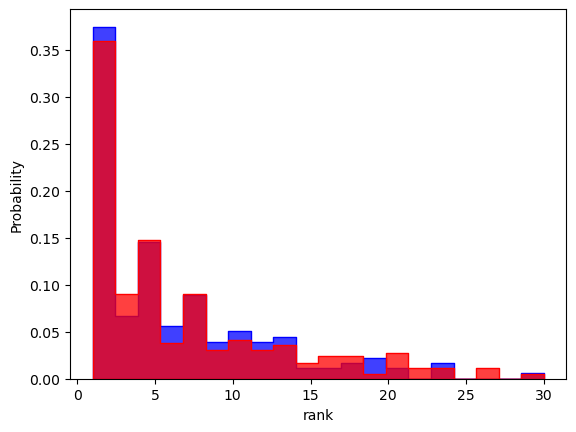

In [68]:
bregion = "PMv_m"
dfranks_this = dfranks[(dfranks["bregion"] == bregion) & (dfranks["pa_class_novel"] == True)]
# sns.histplot(data=dfranks_this, x="rank", hue="pa_class_novel", stat="probability", element="step")
sns.histplot(data=dfranks_this, x="rank", stat="probability", element="step", bins=20, color="b")

dfranks_this = dfranks[(dfranks["bregion"] == bregion) & (dfranks["pa_class_novel"] == False)]
# sns.histplot(data=dfranks_this, x="rank", hue="pa_class_novel", stat="probability", element="step")
sns.histplot(data=dfranks_this, x="rank", stat="probability", element="step", bins=20, color="r")


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


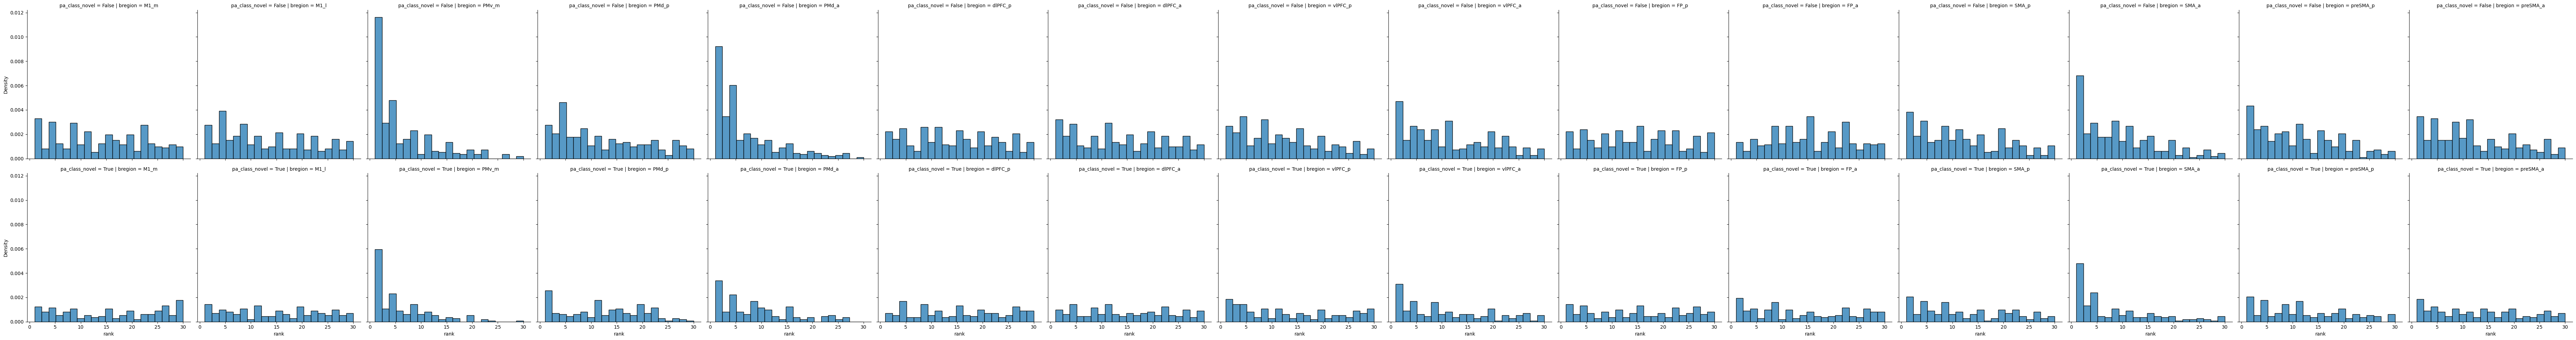

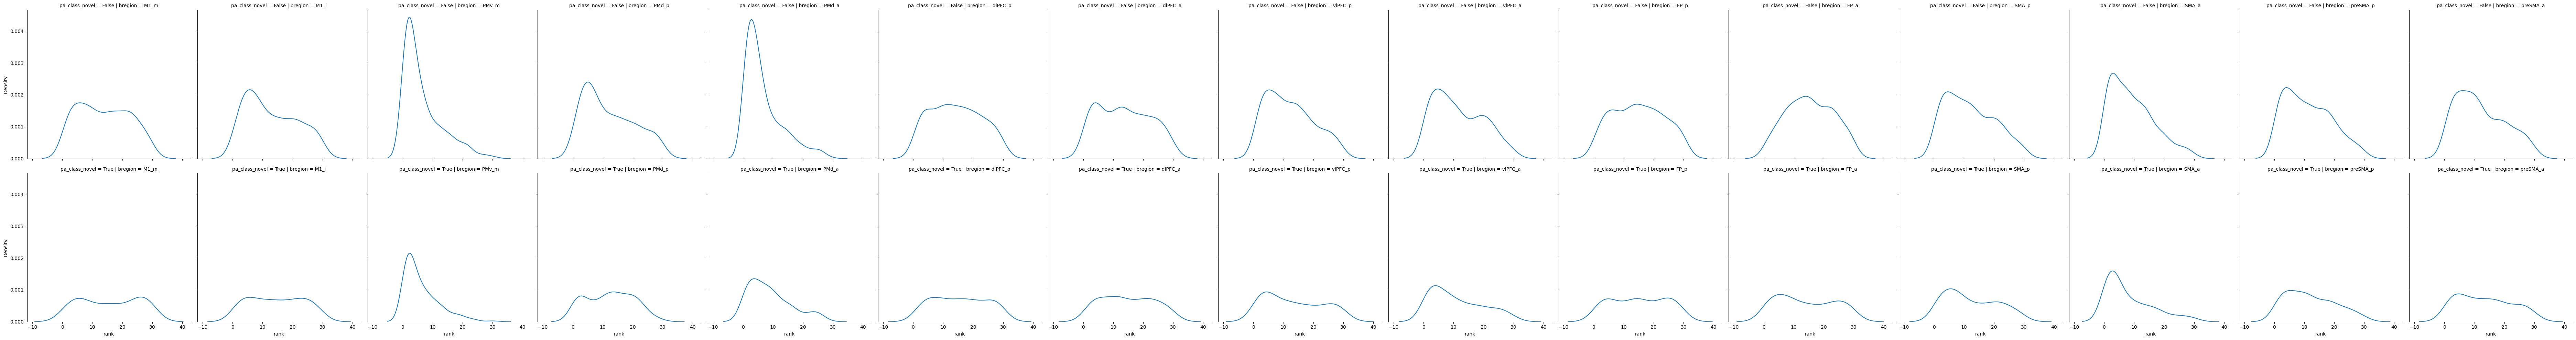

In [51]:
sns.displot(data=dfranks, x="rank", col="bregion", row="pa_class_novel", stat="density")
sns.displot(data=dfranks, x="rank", col="bregion", row="pa_class_novel", kind="kde")

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


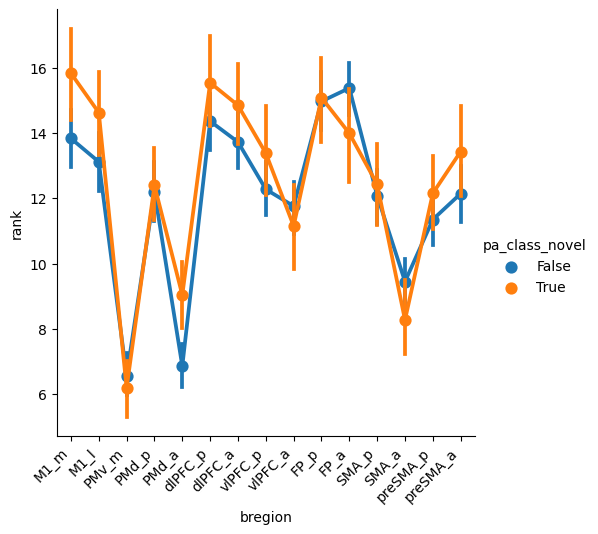

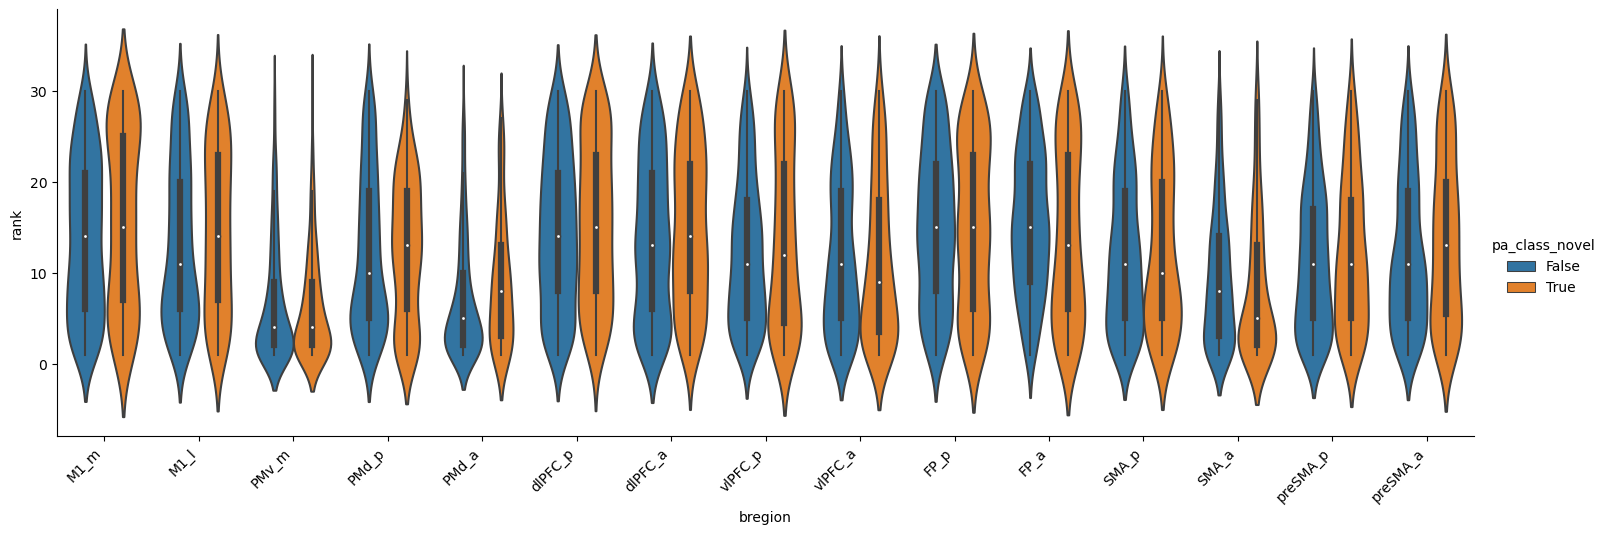

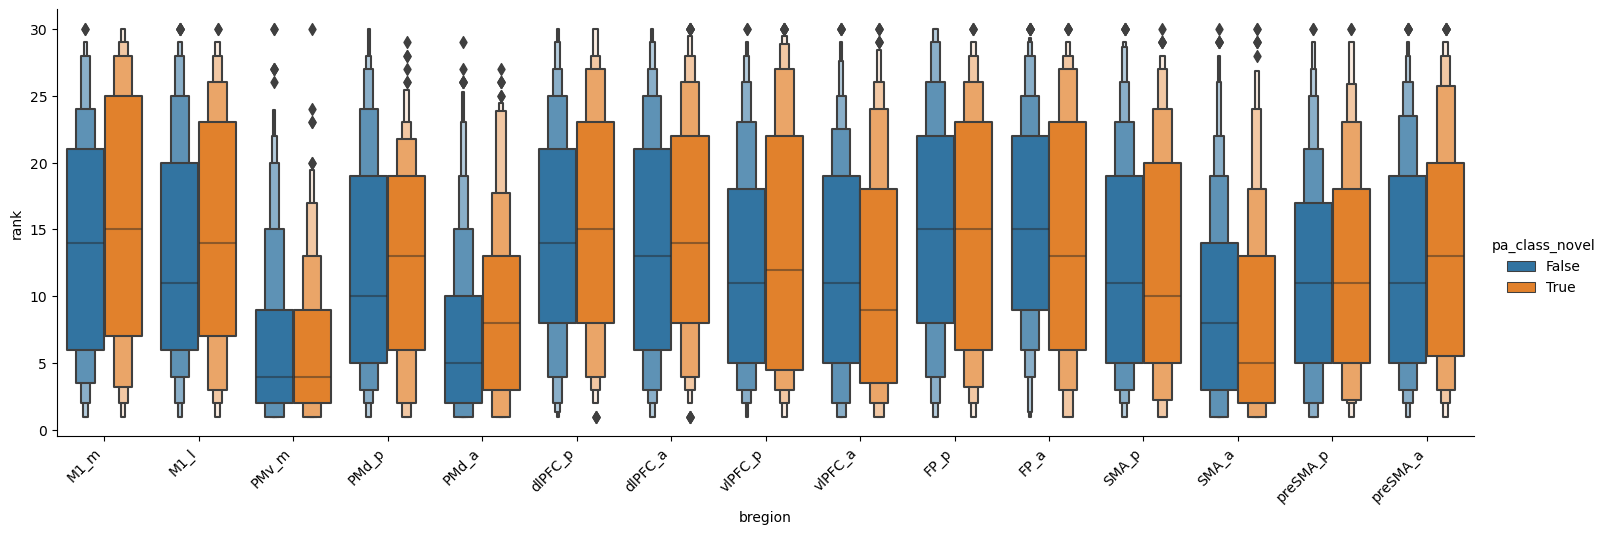

In [50]:

fig = sns.catplot(data=dfranks, x="bregion", y="rank", hue="pa_class_novel", kind="point")
rotateLabel(fig)

fig = sns.catplot(data=dfranks, x="bregion", y="rank", hue="pa_class_novel", kind="violin", aspect=3)
rotateLabel(fig)

fig = sns.catplot(data=dfranks, x="bregion", y="rank", hue="pa_class_novel", kind="boxen", aspect=3)
rotateLabel(fig)

# Plot summary histograms of rank
